In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
# google colab

#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
# google colab
#DATA_PATH = "/content/drive/MyDrive/Cursos/Valerio_Velardo/Deep_Learning_for_audio/data.json"

# local
DATA_PATH = "G:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\data.json"

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nehem\AppData\Local\Temp\ipykernel_14188\1474964677.py:5: SyntaxWarning: invalid escape sequence '\M'
  DATA_PATH = "G:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\data.json"


In [4]:
def load_data(dataset_path):
  with open(dataset_path, 'r') as fp:
    data = json.load(fp)

  # convertir list a numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  return inputs, targets

def split_data(inputs, targets, test_size):
  return train_test_split(inputs, targets, test_size=test_size)

def plot_history(history):
  fig, axs = plt.subplots(2)

  # create accuracy subplot
  axs[0].plot(history.history['accuracy'], label='train accuracy')
  axs[0].plot(history.history['val_accuracy'], label='test accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='lower right')
  axs[0].set_title('Accuracy eval')

  # create error subplot
  axs[1].plot(history.history['loss'], label='train error')
  axs[1].plot(history.history['val_loss'], label='test error')
  axs[1].set_ylabel('Error')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(loc='upper right')
  axs[1].set_title('Error eval')

  plt.show()

g:\My Drive\Cursos\Valerio_Velardo\Deep_Learning_for_audio\Code\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2182 - loss: 15.8809 - val_accuracy: 0.2313 - val_loss: 2.2429
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2571 - loss: 2.0656 - val_accuracy: 0.3421 - val_loss: 2.0376
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3574 - loss: 1.8630 - val_accuracy: 0.3405 - val_loss: 2.0334
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3814 - loss: 1.7648 - val_accuracy: 0.4015 - val_loss: 1.9637
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4170 - loss: 1.6761 - val_accuracy: 0.4089 - val_loss: 1.9095
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4414 - loss: 1.5973 - val_accuracy: 0.4186 - val_loss: 1.9355
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4798 - loss: 1.5082 - val_accuracy: 0.4229 - val_loss: 1.9306
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4825 - loss: 1.4869 - val_accuracy: 0

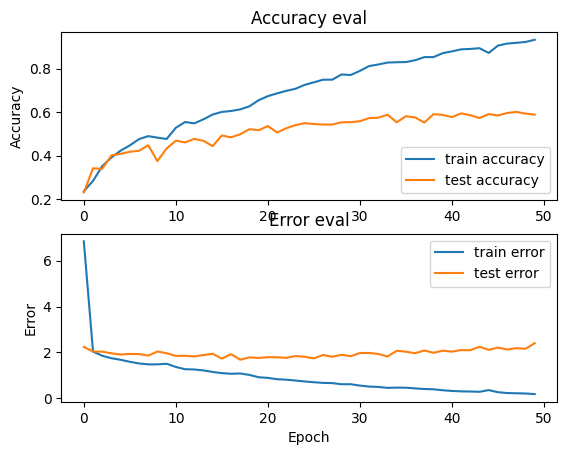

In [5]:
if __name__ == "__main__":
  # load data
  inputs, targets = load_data(DATA_PATH)
  # split data into train and test set
  inputs_train, inputs_test, targets_train, targets_test = split_data(inputs, targets, 0.3)
  # build the networkt arquitecture
  model = keras.Sequential([
      # input layer
      keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])), #(time interval, value coefficient in interval)
      # 1st hidden layer
      keras.layers.Dense(512, activation='relu'),
      # 2st hidden layer
      keras.layers.Dense(256, activation='relu'),
      # 3st hidden layer
      keras.layers.Dense(64, activation='relu'),
      # output layer
      keras.layers.Dense(10, activation='softmax') # 10 categories
  ])
  # compile network
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.summary()

  # train network
  history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

  # plot accuracy and error over the epochs
  plot_history(history)

In [ ]:
# HAY OVERFITTING